In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# insurance fraud detection

## Data Preparation

import, prepare/clean the dataset


In [51]:

df= pd.read_csv('insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [52]:
# remove uneccesary variables
df.drop(['policy_number','policy_state','incident_location','incident_date','insured_zip',
           'incident_state','incident_city','insured_hobbies','auto_model','auto_year', '_c39'], axis = 1, inplace = True)


In [53]:
#default police report availability  and Property damage to NO 
df['police_report_available'].replace('?','NO', inplace = True)
df['property_damage'].replace('?','NO', inplace = True)
df['collision_type'].replace('?','Other', inplace = True)

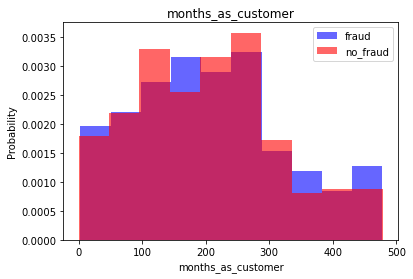

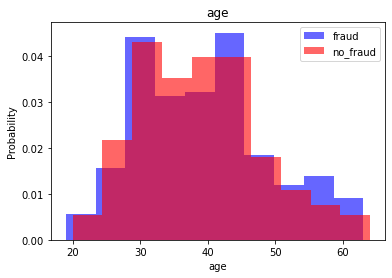

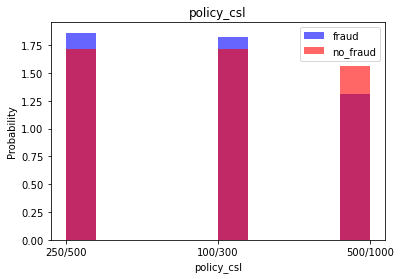

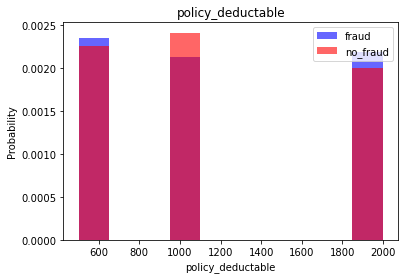

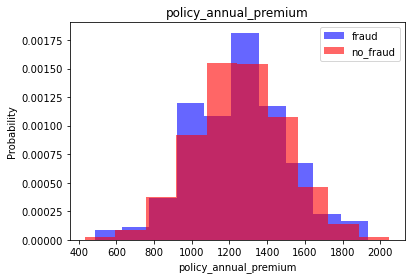

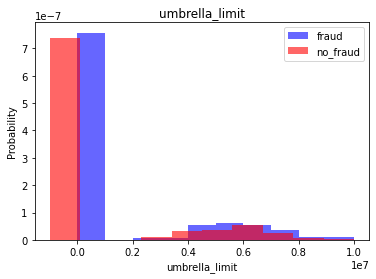

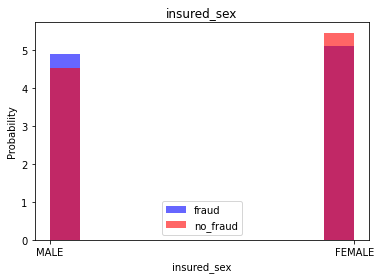

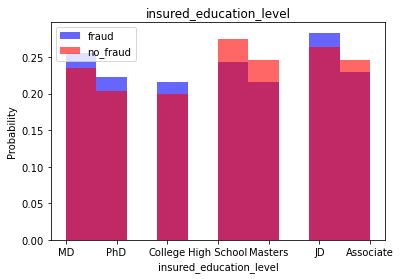

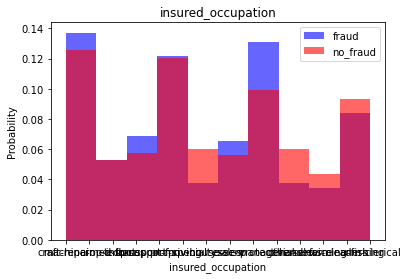

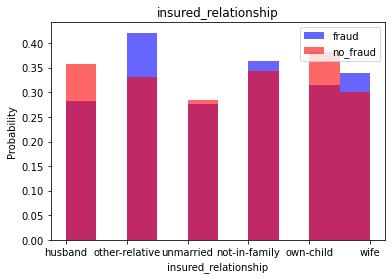

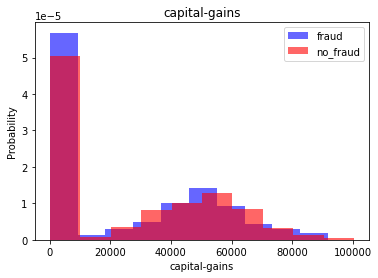

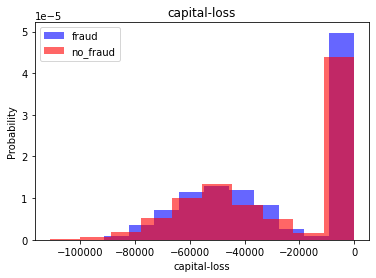

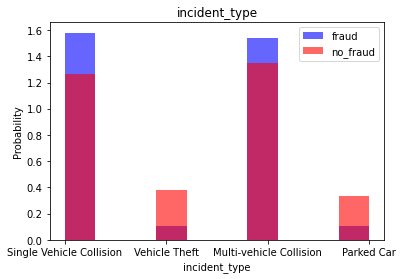

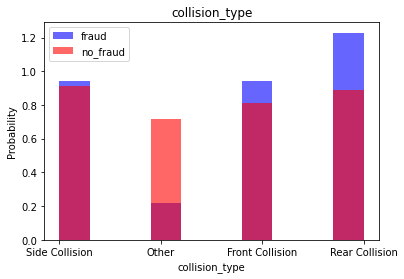

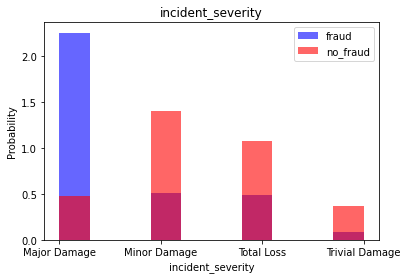

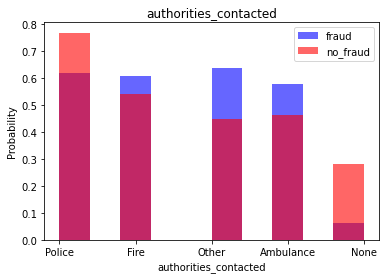

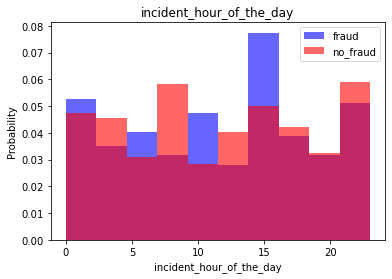

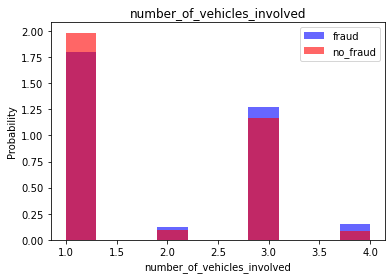

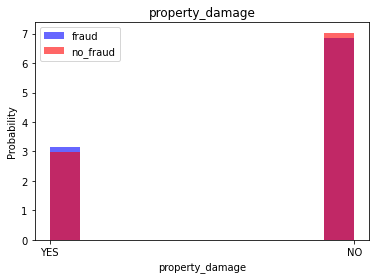

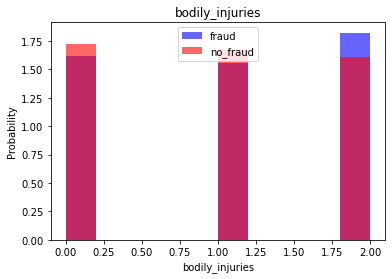

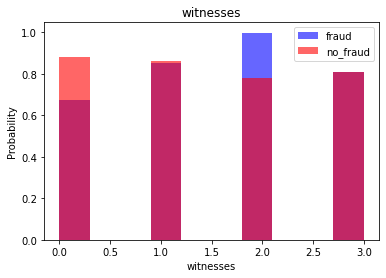

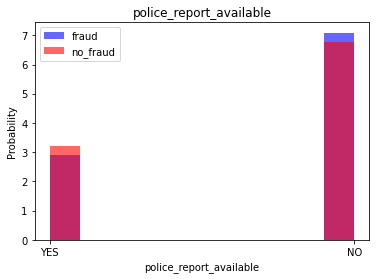

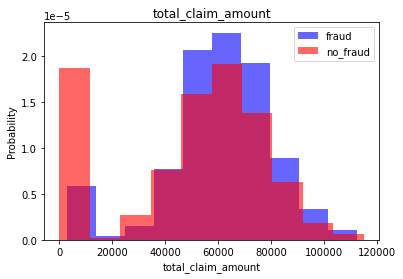

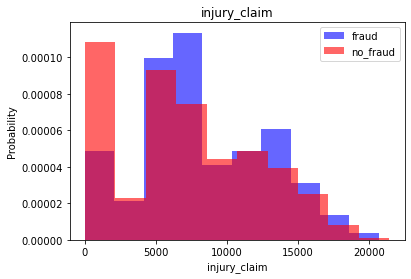

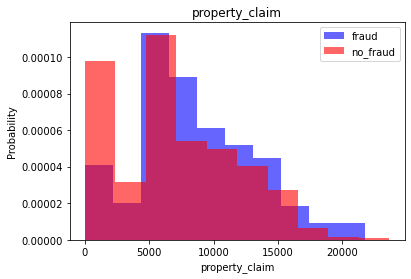

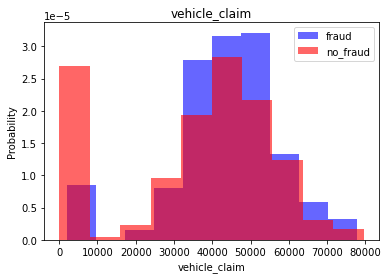

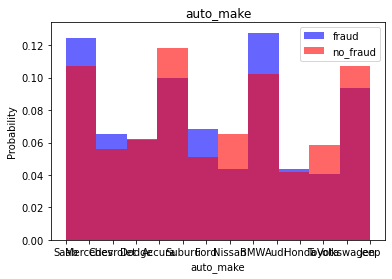

In [54]:
#plot variables against Fraud reported
for label in df.columns[:-1]:
    plt.hist(df[df['fraud_reported']=="Y" ][label], color='blue', label='fraud',alpha = 0.6,density=True) #desity being true to normalise the distribution
    plt.hist(df[df['fraud_reported']=="N" ][label], color='red', label='no_fraud',alpha = 0.6,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [55]:
# create catergorical dataframe
cat_var = df.select_dtypes(include=['object'])
cat_var.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,auto_make,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Saab,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Other,Minor Damage,Police,NO,NO,Mercedes,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,Dodge,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Chevrolet,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Other,Minor Damage,None,NO,NO,Accura,N


In [39]:
#inspect
for c in cat_var.columns:
    print(f"{c} : \n length: {len(cat_var[c].unique())}\n {cat_var[c].unique()} \n")


policy_csl : 
 length: 3
 ['250/500' '100/300' '500/1000'] 

insured_sex : 
 length: 2
 ['MALE' 'FEMALE'] 

insured_education_level : 
 length: 7
 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 

insured_occupation : 
 length: 14
 ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 

insured_relationship : 
 length: 6
 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 

incident_type : 
 length: 4
 ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 

incident_severity : 
 length: 4
 ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage'] 

authorities_contacted : 
 length: 5
 ['Police' 'None' 'Fire' 'Other' 'Ambulance'] 

auto_make : 
 length: 14
 ['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'F

In [56]:
# encode catergorical variables
cat_var = pd.get_dummies(cat_var, drop_first = True) 
cat_var.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,fraud_reported_Y
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
int_var = df.select_dtypes(include=["int64"])
int_var.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [58]:
#combine numerical and catergorical dataframes
df = pd.concat([int_var,cat_var] , axis = 1)
df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,fraud_reported_Y
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,0,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,0,0,0,0,0
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,0,0,0,0,0,0,0


### Train, Valid, Test datasets

In [59]:
train, valid,test = np.split(df.sample(frac =1),[ int(0.6*len(df)),int(0.8*len(df))])

In [60]:
#scale the dataset and define x and y

def scale_dataset(dataframe,oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x,y= ros.fit_resample(x,y)

    data = np.hstack((x,np.reshape(y,(-1,1))))

    return data, x, y

In [61]:
train,x_train,y_train = scale_dataset(train, oversample = True)
valid,x_valid,y_valid = scale_dataset(valid, oversample = False)
test,x_test,y_test = scale_dataset(test, oversample = False)

### Fit ML models

For this project we trying to detect if a claim is fraud or not, we are going to use a couple of classifications and compare then to a neuro network model to see which one will produce better results

#### KN classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [63]:

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.64      0.70       151
           1       0.28      0.43      0.34        49

    accuracy                           0.59       200
   macro avg       0.53      0.54      0.52       200
weighted avg       0.65      0.59      0.61       200



### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.50      0.62       151
           1       0.30      0.67      0.42        49

    accuracy                           0.54       200
   macro avg       0.56      0.59      0.52       200
weighted avg       0.70      0.54      0.57       200



### Linear Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       151
           1       0.49      0.59      0.54        49

    accuracy                           0.75       200
   macro avg       0.67      0.70      0.68       200
weighted avg       0.77      0.75      0.76       200



### Surport vector Mechines

In [68]:
from sklearn.svm import SVC

In [69]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       151
           1       0.52      0.47      0.49        49

    accuracy                           0.77       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.76      0.77      0.76       200



### XGBoost

In [70]:
from xgboost import XGBClassifier

In [71]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
print(classification_report(y_test,y_pred))

c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       151
           1       0.57      0.49      0.53        49

    accuracy                           0.79       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.78      0.79      0.78       200



### NN
From our classification models, the highest accuracy was just over 80%. Now, lets see if we can beat that with Neuron Nework

In [73]:
import tensorflow as tf

In [74]:
def plot_loss(history):

    plt.plot(history.history['loss'],label = 'loss')
    plt.plot(history.history['val_loss'],label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'],label = 'accuracy')
    plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [75]:
def train_model(x_train,y_train,num_nodes,dropout_prob, lr, batch_size ,epochs):


    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (69,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = "relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation = "sigmoid")
    ])

    nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss ="binary_crossentropy" , metrics = ['accuracy'])

    history = nn_model.fit(
    x_train, y_train ,epochs = epochs , batch_size=batch_size, validation_split = 0.2 ,verbose = 0
    )

    return nn_model,history

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01, 0.005,0.001]:
            for batch_size in [32,64,128]: 
                print(f"{num_nodes} nodes and {dropout_prob} dropout prob, learning rate of {lr}, batch size {batch_size} ")
                model,history = train_model(x_train,y_train,num_nodes,dropout_prob, lr, batch_size ,epochs)
                #plot_loss(history)
                val_loss = model.evaluate(x_valid,y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model
            


In [77]:
least_loss_model.predict(x_test)
y_pred = (y_pred >0.5).astype(int).reshape(-1,)
print(classification_report(y_test,y_pred))



7/7 [==============================] - 5s 6ms/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       151
           1       0.57      0.49      0.53        49

    accuracy                           0.79       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.78      0.79      0.78       200



### Results

KNN : 56%
Naive bayse : 48%
Logistic regression : 73%
Surpport vector mechine: 80%
xgboost : 78%
Neuro Network: 78%